<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
pip install pytesseract

In [83]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.



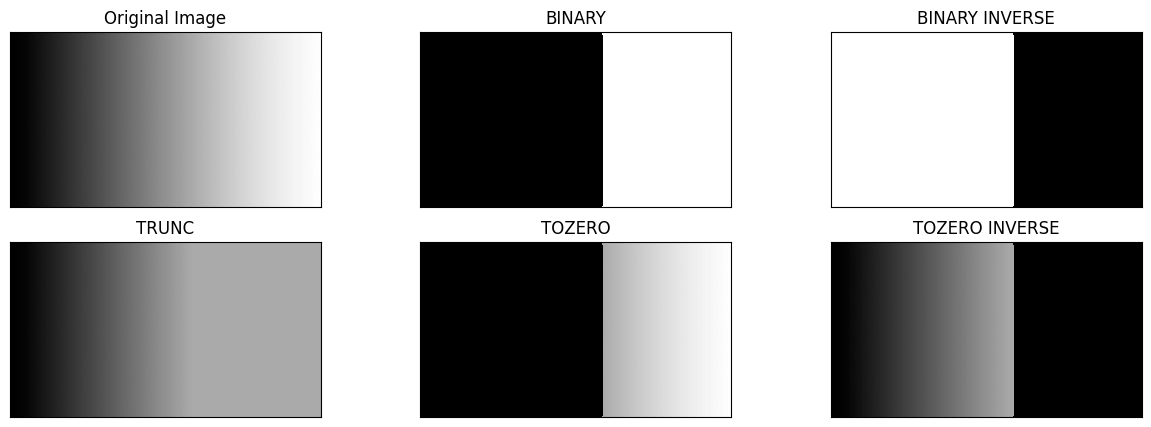

In [84]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/gradient.jpg')
thresh = 170

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)

#3. Threshold Truncate
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)

#4. Threshold Tozero
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)

#5. Threshold Tozero Inverse
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY INVERSE', 'TRUNC', 'TOZERO', 'TOZERO INVERSE']
images = [img, thresh1, thresh2, thresh3, thresh4,thresh5]

plt.figure(figsize = (15, 5))
for i in range(len(images)):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

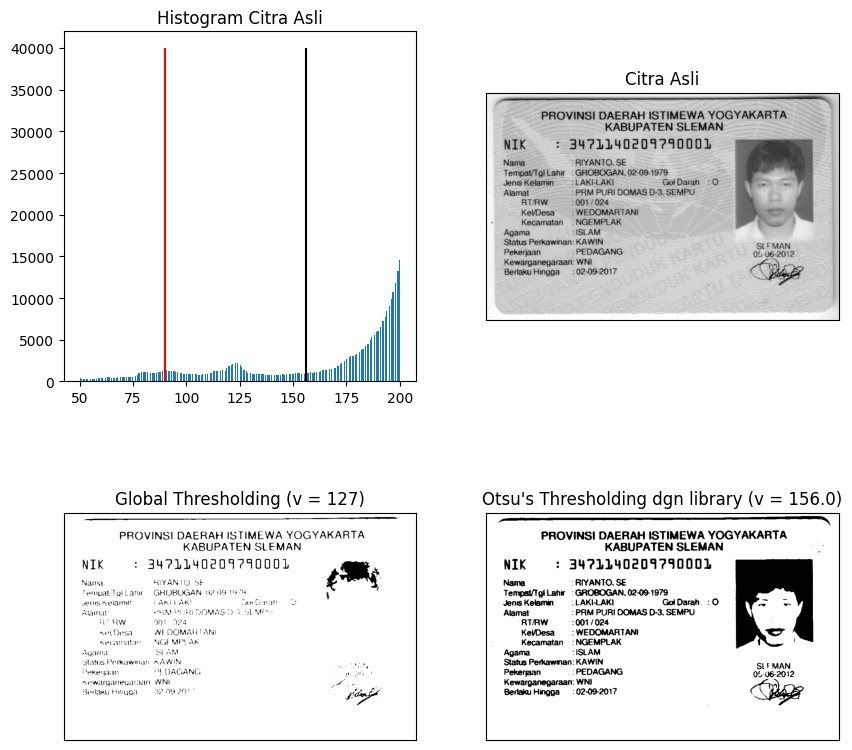

In [85]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp.png', 0)
blur = cv.GaussianBlur(img2, (5,5), 0)
thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-
  tutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking warna putih yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan Citra Segment).

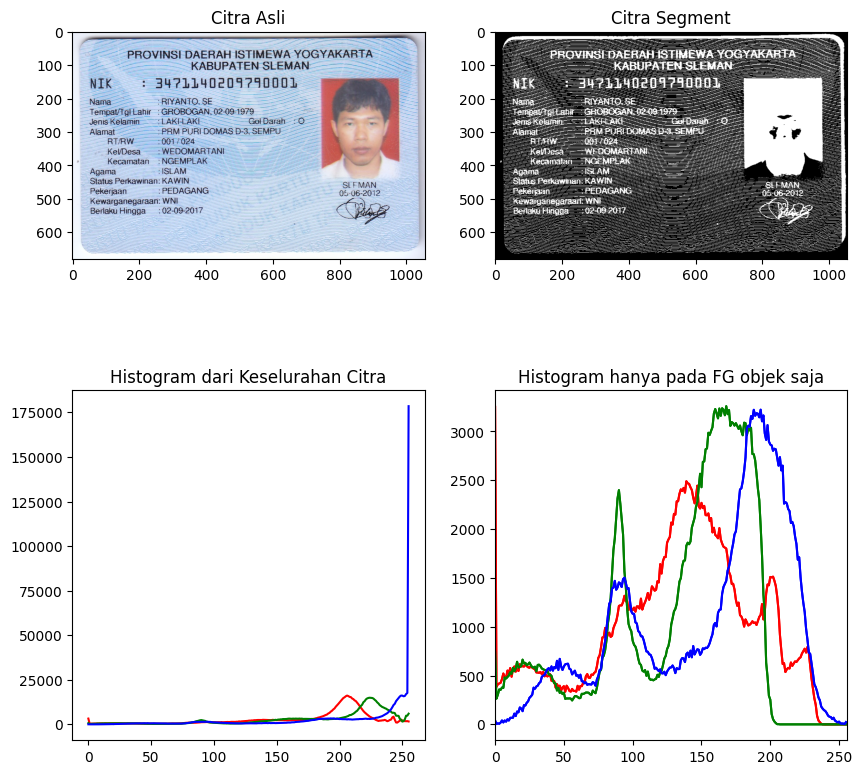

In [86]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp.png')
img_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r', 'g', 'b')

for i, col in enumerate(color):
  hist0 = cv.calcHist([img_rgb], [i], None, [256], [0,256])
  plt.subplot(2, 2, 3), plt.plot(hist0, color = col)
  plt.title('Histogram dari Keselurahan Citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f65aa45e0e0>)

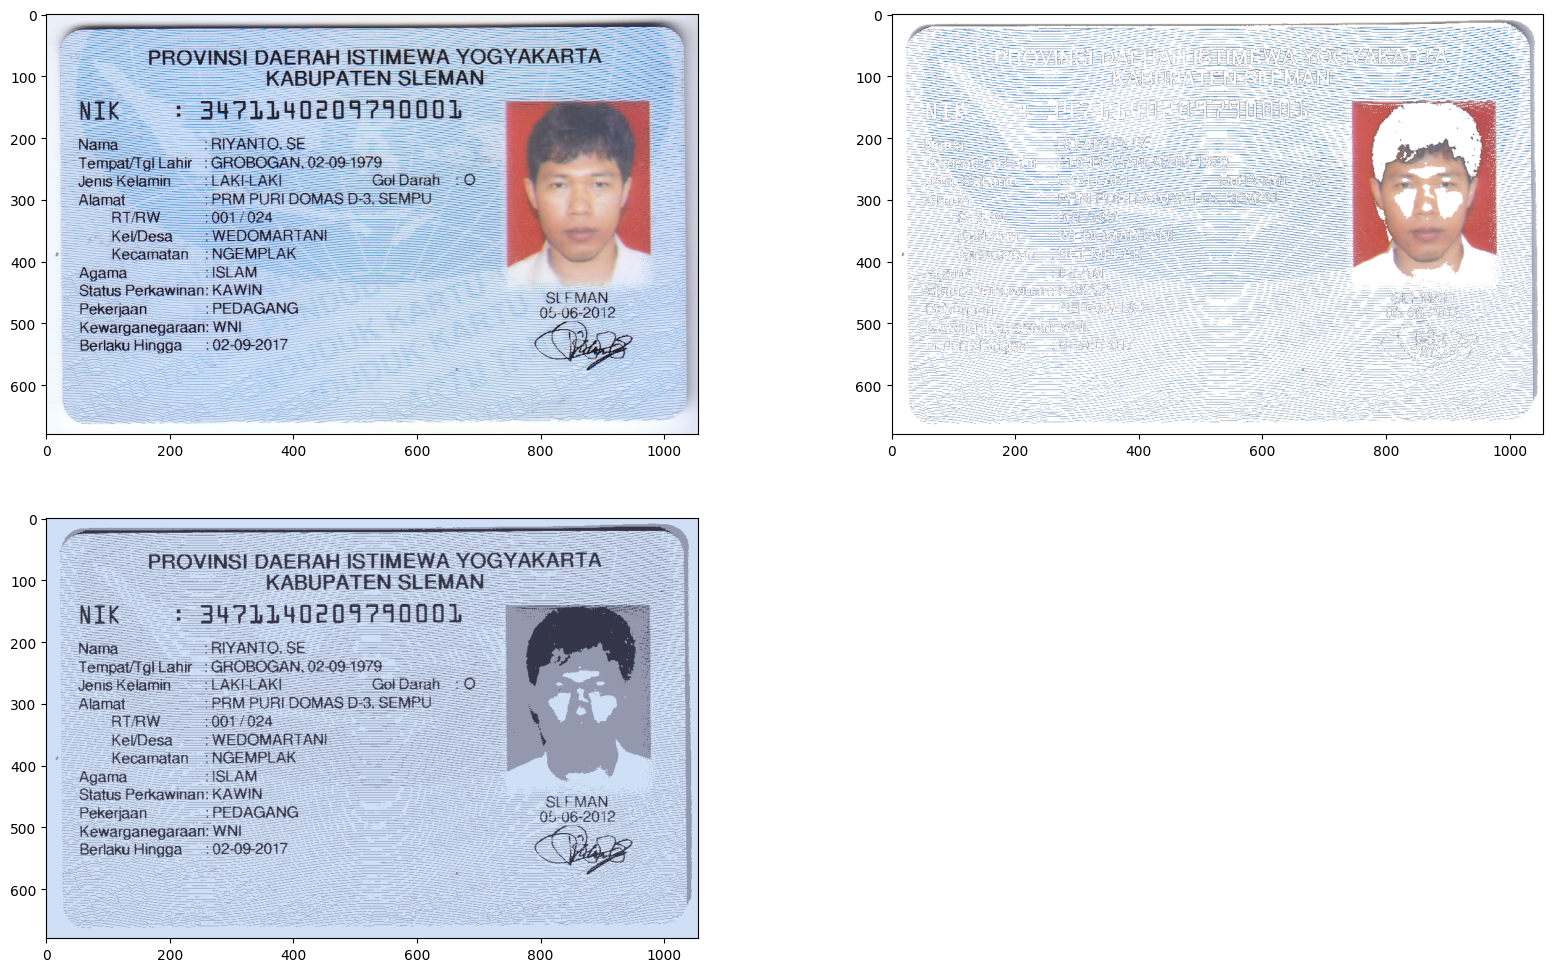

In [87]:
# Kmeans Image Segmentation
img = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_val = img.reshape((-1, 3))
# convert to float
pixel_val = np.float32(pixel_val)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_val, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi titik centroid ke dalam Integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli ke warna dari tiap centroidnya
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

masked_img = np.copy(img)
masked_img = masked_img.reshape((-1, 3))
# cluster = 2
masked_img[labels != 2] = [255, 255, 255]
masked_img = masked_img.reshape(img.shape)

plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_img)
plt.subplot(2, 2, 3), plt.imshow(segmented_img)

# **E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan**

1. Install PIP OCR

In [88]:
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [89]:
def show(img, cmap='gray'):
  fig = plt.figure(figsize = (12, 10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [90]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp.png')
data = pytesseract.image_to_data(img, output_type=Output.DICT)
print(data.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


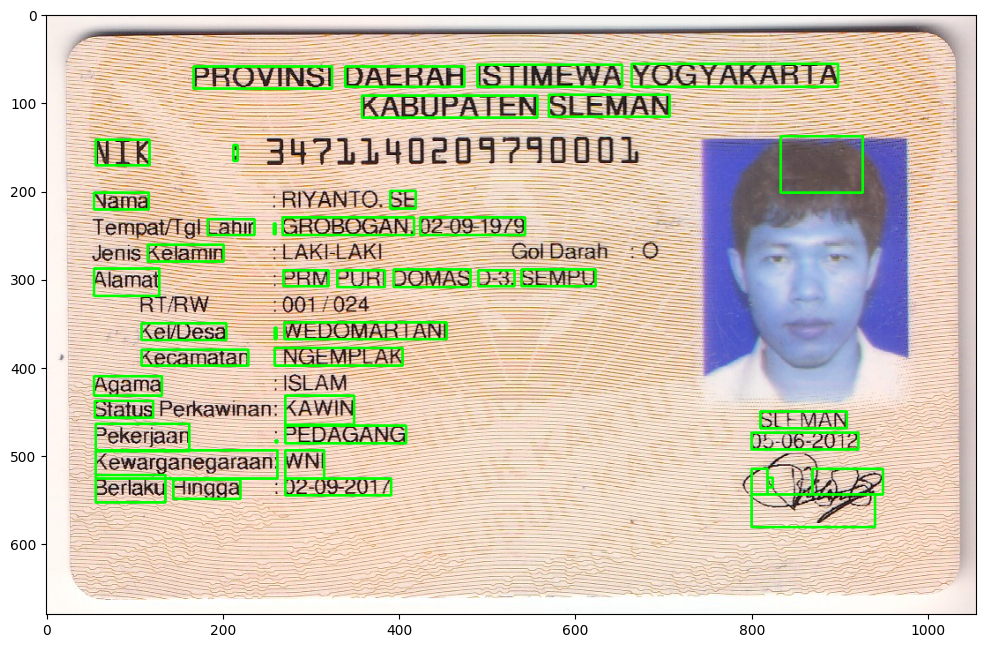

In [91]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show(img)


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



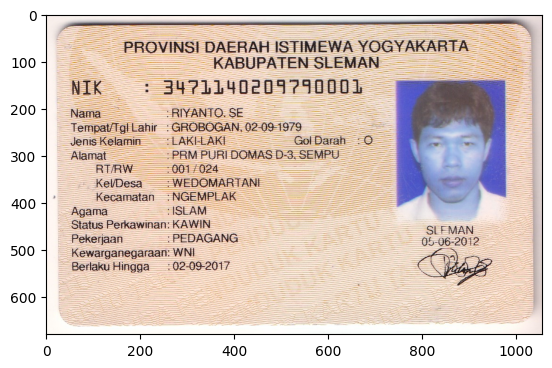

In [92]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp.png')
plt.imshow(img4)
gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()


# **F. Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.**

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


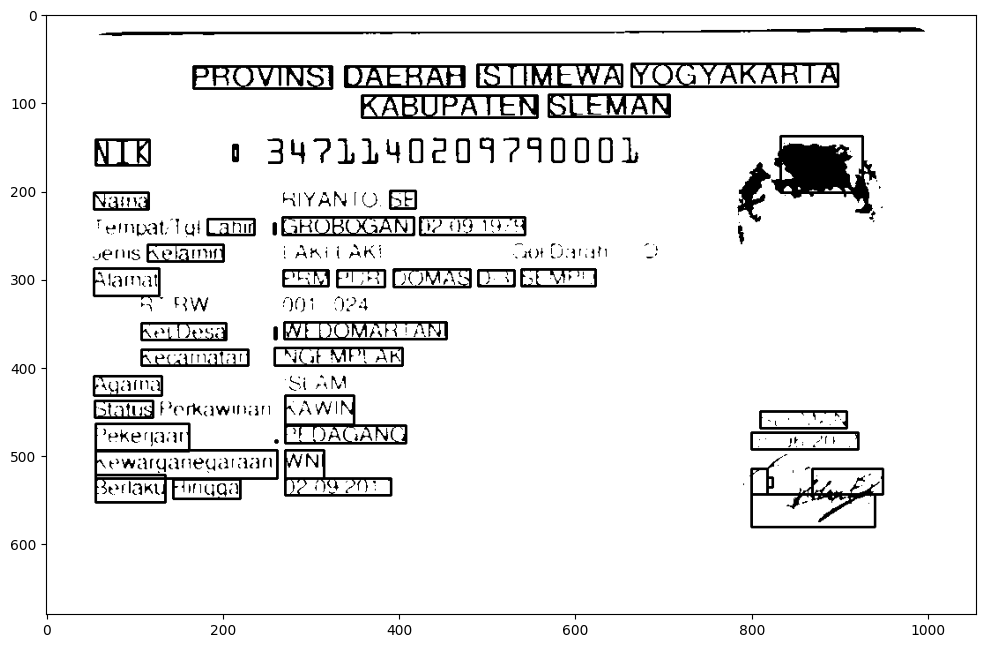

In [93]:
from pytesseract import Output
data = pytesseract.image_to_data(citra3[1], output_type=Output.DICT)
print(data.keys())

n_box = len(text1['text'])
for i in range(n_box):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(citra3[1], (x, y), (x + w, y + h), (0, 255, 0), 2)
show(img)

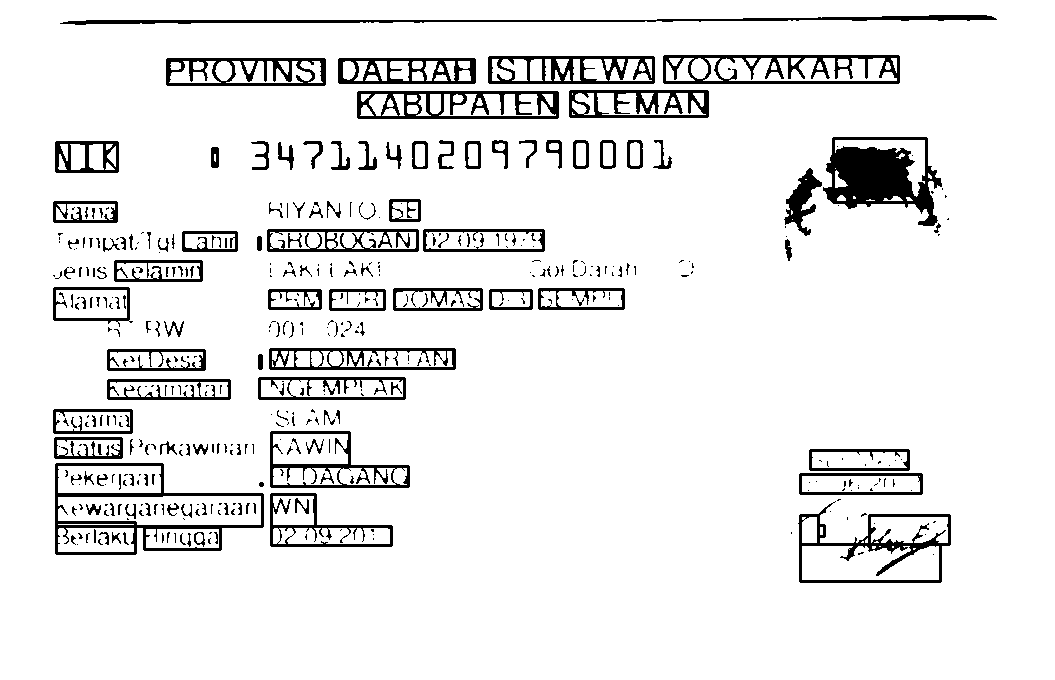

 

DAERAH STIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK 0 34?1140009”71D001
RIYANIO. EE t .
, ,

TempatTgi 1GROBOGANJ

yes LAKI LAKI S0 Darat :
Alamat nego ak
3 RW A01 9P3
SID INEDOMARTAN
SILAM
Batu Perkawwan —

CJ Tn

'ekerjaat
ewarganeyaraan
NGGA

    
    

 

 



In [95]:
cv2_imshow(citra3[1])

th, threshed = cv.threshold(citra3[1], 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()